<a href="https://colab.research.google.com/github/jaoviedoc/Estructuras_Hidraulicas/blob/main/Calcular_Y_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcular   ${\color{DarkOrange} y_{c} }$

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#@title Datos iniciales { run: "auto", vertical-output: true, display-mode: "form" }
Q = 0.5 #@param {type:"number"}  # m^3 . s^-1    #Caudal del canal
b = 0 #@param {type:"number"}   # m             #Ancho en la base
m1 = 1 #@param {type:"number"}                   #Taludes verticales
m2 = 3 #@param {type:"number"}                   #Taludes verticales
g = 9.81 # m . s^-2


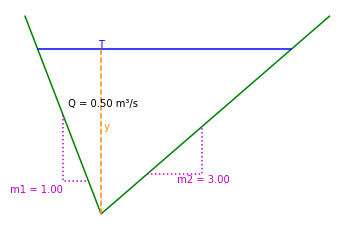

In [12]:
#@title

y_A = 1               #Altura del agua medida desde la superficie del canal
y_al = y_A*1.2        #Altura canal

# Dibujo del canal
x_Canal = np.array([0, y_al * m1, (( y_al * m1) + b), (y_al * m1 + b + y_al * m2)])
y_Canal = np.array([0, -y_al   , -y_al            , 0])
plt.plot(x_Canal, y_Canal, color='g')

# Dibujo de la superficie del agua
y_A_D = y_al - y_A
x_Agua = np.array([y_A_D * m1    , (y_al * m1 + b + y_al * m2)- (y_A_D * m2)])
y_Agua = np.array([-(y_al - y_A), -(y_al - y_A)])
plt.plot(x_Agua, y_Agua, color='b')

# Cota y
x_E_y = np.array([(y_al * m1) + (b/10), (y_al * m1) + (b/10)])
y_E_y = np.array([-y_al, -y_A_D])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Dibujo pendiente del canal
if m1 > 0:
  y_C_m1 = y_al - (y_al * 0.2)
  x_m1 = np.array ([ (y_al/2)*m1, (y_al/2)*m1 ,y_C_m1 * m1])
  y_m1 = np.array ([-(y_al/2),-1,-1])
  plt.plot(x_m1, y_m1, color='m', linestyle=':')
  x_m1_L= ((y_al/2)*m1 + (y_al/2)*m1)/2
  plt.text(x_m1_L , -(y_C_m1+0.06),  f' m1 = {m1:.2f}' , ha='right', va='top' , c='m')

if m2 > 0:
  y_C_M = y_al - (y_al * 0.2)
  x_M = np.array([(y_al * m1 + b + y_al * m2) - (y_C_M * m2), (y_al * m1 + b + y_al * m2)-((y_C_M * m2)*0.7), (y_al * m1 + b +  y_al * m2)-((y_C_M * m2)*0.7)])
  y_M_A = ((((b + 2 * y_al * m2)-((y_C_M * m2)*0.7))-((b + 2 * y_al * m2) - (y_C_M * m2)))/m2)-y_C_M
  y_M = np.array([-y_C_M , -y_C_M , y_M_A])
  plt.plot(x_M, y_M, color='m', linestyle=':')
  x_M_L = (((y_al * m1 + b + y_al * m2)-((y_C_M * m2)*0.7))+((y_al * m1 + b + y_al * m2) - (y_C_M * m2)))/2
  plt.text(x_M_L , -y_C_M,  f' m2 = {m2:.2f}' , ha='left', va='top' , c='m')


# Textos
plt.text( (y_al * m1) + (b/2), -y_A_D,  'T' , ha='center', va='bottom' , c='b')
plt.text((y_al * m1) + (b/10), -((y_al+y_A_D)/2) ,  ' y' , ha='left', va='bottom', c='darkorange', )
plt.text((y_al * m1) + (b/2), -((y_al+y_A_D)/2.5) ,  f' Q = {Q:.2f} m³/s' , ha='center', va='bottom', c='k')
if b > 0:
  plt.text( (y_al * m1) + (b/2), -y_al,  f' b = {b:.2f} m' , ha='center', va='top', c='g')

plt.axis('off')

plt.show()




  Partiendo de Froude = 1

In [13]:
#@title
from math import sqrt

def ecuacion (y, x):
  return sqrt ((g * (((m1*y**2)/2 + b*y + (m2*y**2)/2)**3)) / (y*m1 + b + y*m2)) - x

In [14]:
from scipy.optimize import fsolve

sol = fsolve(lambda y: ecuacion(y, Q), 1)
print("El valor de y_c es:", sol[0])

El valor de y_c es: 0.41787674303984984


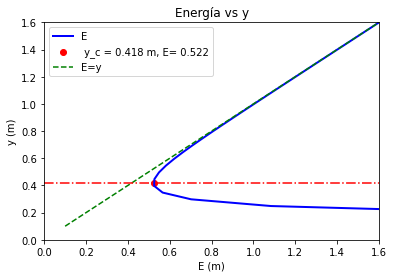

In [17]:
#@title
y_range = np.linspace(0.1, 5, 100)
E = y_range + ((Q**2)/(((((m1*y_range**2)/2 + b*y_range + (m2*y_range**2)/2))**2)*2*g))
plt.plot(E, y_range, c = 'b', linewidth=2, label = 'E')

y_c = sol[0]
E_c = y_c + ((Q**2)/((((m1*y_c**2)/2 + b*y_c + (m2*y_c**2)/2)**2)*2*g))
plt.plot(E_c, y_c)
plt.scatter(E_c, y_c, c='r', label=f' y_c = {y_c:.3f} m, E= {E_c:.3f}')

E_igual_Y = y_range
plt.plot(E_igual_Y, y_range, c = 'g', label = 'E=y', linestyle='--')

E_rango_c = np.array([0, 5])
y_rango_c = np.array([y_c, y_c])
plt.plot(E_rango_c, y_rango_c, c = 'r', linestyle='-.')

plt.xlabel('E (m)')
plt.ylabel('y (m)')
plt.title('Energía vs y')
plt.legend()
plt.axis([0, 1.6, 0, 1.6])
plt.show()